In [1]:
import os
os.chdir('/Users/ngdnhtien/Research/Codespace/bosonic/bqec@huikhoon')

import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import utility as ut
import constant as constant
from scipy.optimize import minimize
import math

%config InlineBackend.figure_formats = ['svg']

In [2]:
nA = 20
nB = 20
nC = 10

a = qt.tensor(qt.destroy(nA), qt.qeye(nB), qt.qeye(nC))
b = qt.tensor(qt.qeye(nA), qt.destroy(nB), qt.qeye(nC))
c = qt.tensor(qt.qeye(nA), qt.qeye(nB), qt.destroy(nC))

n_a = a.dag() * a
n_b = b.dag() * b
n_c = c.dag() * c

# System parameters

In [3]:
omega_10 = 4.936
alpha = 0.168
omega_c = omega_10 + alpha

EC = alpha
EJ = omega_c**2 / (8 * alpha)

In [4]:
# Cavity-transmon detunings
r1ac = 9.64 # delta_ac = r1ac * alpha
delta_ac = r1ac * alpha
r1bc = -9.0 # delta_bc = r1bc * alpha
delta_bc = r1bc * alpha

# Cavity-transmon coupling strengths

r2ac = 0.064 # g_ac = r2ac * delta_ac
g_ac = 1j * r2ac * delta_ac
r2bc = 0.050 # g_bc = r2bc * delta_bc
g_bc = 1j * r2bc * delta_bc

# Drive parameters

r3 = 0.26 # delta_d = r3 * alpha
delta_d = r3 * alpha
r4 = 0 # Omega_d = r4 * delta_d
theta_d = 0
Omega_d = r4 * delta_d * np.exp(-1j * theta_d)
omega_d = omega_10 + delta_d

In [5]:
omega_a = r1ac * alpha + omega_10
omega_b = r1bc * alpha + omega_10

# Hamiltonian construction

In [6]:
H_cavA = omega_a * n_a
H_cavB = omega_b * n_b

n_op = -1j * (8 * EC / EJ)**(-1/4) * (c - c.dag()) / np.sqrt(2)
p_op = (8 * EC / EJ)**(-1/4) * (c + c.dag()) / np.sqrt(2)
H_ancC = 4 * EC * n_op**2 - EJ * p_op.cosm()

def H1_coeff(t, args):
    return np.exp(1j * omega_d * t)

H_drv_S1 = (c - c.dag()) * (np.conj(Omega_d))

def H2_coeff(t, args):
    return np.exp(-1j * omega_d * t)

H_drv_S2 = - (c - c.dag()) * Omega_d

H_int = g_ac * (c - c.dag()) * (a.dag() + a) + g_bc * (c - c.dag()) * (b.dag() + b)

In [ ]:
qt.tensor(n_a, n_b, n_c) bare_states[0]

# Exact diagonalization

In [15]:
H_bare = H_cavA + H_cavB + H_ancC

bare_energies, bare_states = H_bare.eigenstates()

bare_labelling = []

for idx, state in enumerate(bare_states):
    n_a_val = np.real(state.dag() * n_a * state)[0][0]
    n_b_val = np.real(state.dag() * n_b * state)[0][0]
    n_c_val = np.real(state.dag() * n_c * state)[0][0]

    bare_labelling.append((n_a_val, n_b_val, n_c_val))

bare_labelling = np.array(bare_labelling)

In [22]:
len(bare_labelling[::20])

200

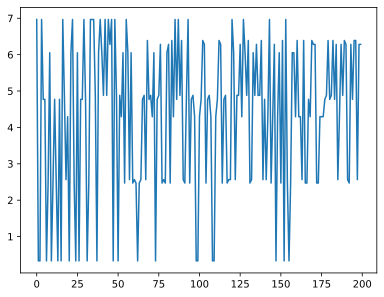

In [23]:
plt.scatter(np.linspace(0, bare_labelling[::20][:, 2], lebare_labelling[::20][:, 2])

In [11]:
bare_labelling = np.round(bare_labelling)

In [12]:
bare_labelling

array([[[[ 0.]],

        [[ 0.]],

        [[ 7.]]],


       [[[ 0.]],

        [[ 1.]],

        [[ 7.]]],


       [[[ 0.]],

        [[ 0.]],

        [[ 6.]]],


       ...,


       [[[18.]],

        [[19.]],

        [[ 6.]]],


       [[[19.]],

        [[18.]],

        [[ 6.]]],


       [[[19.]],

        [[19.]],

        [[ 6.]]]])

In [56]:
H_dressed = H_cavA + H_cavB + H_ancC + H_int + (c - c.dag()) * (np.conj(Omega_d) - Omega_d)

dressed_energies, dressed_states = H_dressed.eigenstates()

entangled_labelling = bare_labelling - bare_labelling 
highest_fidelity_found_list = []

for i, entangled_state in enumerate(dressed_states):
    
    highest_fidelity_found = 0
    idx_found_by_state_fidelity = 0

    for j, uncoulped_state in enumerate(bare_states):
        
        # Compute state fidelity
        state_fidelity = qt.fidelity(entangled_state, uncoulped_state)
        
        # Update index
        if state_fidelity > highest_fidelity_found:
            highest_fidelity_found = state_fidelity
            idx_found_by_state_fidelity = j

    highest_fidelity_found_list.append(highest_fidelity_found)
    
    # Acquire entangled labelling index
    entangled_labelling[i] = bare_labelling[idx_found_by_state_fidelity]

In [65]:
cond_A = (entangled_labelling[:, 2] == 0) & (entangled_labelling[:, 1] == 0)
ground_state_indices = np.where(cond_A)[0]

In [69]:
dressed_labelling_filtered = entangled_labelling[ground_state_indices]
dressed_state_filterd = dressed_states[ground_state_indices]

In [71]:
NA = dressed_labelling_filtered[:, 0]

NA_int = np.array([round(N) for N in NA])

NA_int

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [5]:
math.factorial(5)

120

In [6]:
plus_beta_state = 0

beta = np.sqrt(3)

for idx, NA_val in enumerate(NA_int):
    plus_beta_state += ((beta**NA_val) / np.sqrt(math.factorial(NA_val))) * dressed_state_filterd[idx]

plus_beta_state = np.exp(-np.abs(beta)**2/2) * plus_beta_state   

minus_beta_state = 0

beta = -np.sqrt(3)

for idx, NA_val in enumerate(NA_int):
    minus_beta_state += ((beta**NA_val)/ np.sqrt(math.factorial(NA_val))) * dressed_state_filterd[idx]

minus_beta_state = np.exp( -np.abs(beta)**2 / 2 ) * minus_beta_state    

N = 2 + 2 * np.exp(-2*np.abs(beta)**2)
beta_state = (plus_beta_state + minus_beta_state) * N**(-1/2)

NameError: name 'NA_int' is not defined

(<Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

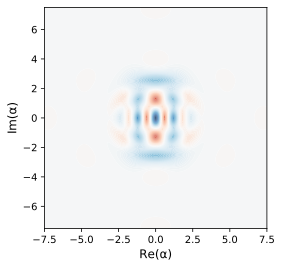

In [74]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(4,4))
qt.plot_wigner(beta_state.ptrace(0), ax=ax1, fig=fig)

In [9]:
time_10us = np.linspace(0, 2*np.pi*10000, 100)
init_state = qt.tensor((qt.coherent(nA, 1.5)+qt.coherent(nA, -1.5)).unit(), qt.coherent(nB, 1.5), qt.fock(nC, 0))

res = qt.mesolve(H=H0, rho0=init_state, tlist=time_10us, c_ops=None, e_ops=None,
                options={'progress_bar':'text', 'nsteps': int(1e5)})

qt.qsave(res, 'cross_Kerr/data/two_mode_10us_no_drive')

10.1%. Run time: 28295.49s. Est. time left: 02:21:57:09
20.2%. Run time: 56121.57s. Est. time left: 02:13:34:40
30.3%. Run time: 83837.09s. Est. time left: 02:05:33:45
40.4%. Run time: 111708.97s. Est. time left: 01:21:46:10
50.5%. Run time: 139472.37s. Est. time left: 01:13:58:02
60.6%. Run time: 173231.44s. Est. time left: 01:07:16:40
70.7%. Run time: 201148.61s. Est. time left: 00:23:08:52
80.8%. Run time: 228518.37s. Est. time left: 00:15:04:33
90.9%. Run time: 261238.59s. Est. time left: 00:07:15:23
100.0%. Run time: 286768.17s. Est. time left: 00:00:00:00
Total run time: 286768.19s


In [44]:
res = qt.qload('cross_Kerr/data/two_mode_10us_no_drive')

In [13]:
init_state = qt.tensor((qt.coherent(nA, 1.5)+qt.coherent(nA, -1.5)).unit(), qt.coherent(nB, 1.5), qt.fock(nC, 0))

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4))
qt.plot_wigner(init_state.ptrace(0), ax=ax1, fig=fig)
qt.plot_wigner(res.states[30].ptrace(0), ax=ax2, fig=fig)
qt.plot_wigner(res.states[-1].ptrace(0), ax=ax3, fig=fig)
fig.tight_layout()

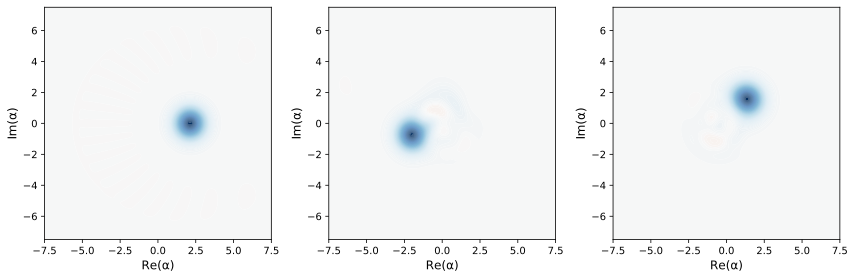

In [45]:
init_state = qt.tensor((qt.coherent(nA, 1.5)+qt.coherent(nA, -1.5)).unit(), qt.coherent(nB, 1.5), qt.fock(nC, 0))

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4))
qt.plot_wigner(init_state.ptrace(1), ax=ax1, fig=fig)
qt.plot_wigner(res.states[30].ptrace(1), ax=ax2, fig=fig)
qt.plot_wigner(res.states[-1].ptrace(1), ax=ax3, fig=fig)
fig.tight_layout()

# Fitting

In [29]:
def H_eff(delta_a, delta_b, K_a, K_b, chi_ab):
    '''
        Effective Hamiltonian (lab frame)
    '''

    H_linear = (omega_a + delta_a) * n_a + (omega_b + delta_b) * n_b
    H_quadratic = K_a * n_a**2 + K_b * n_b**2
    H_cross = chi_ab * n_a * n_b
        
    return H_linear + H_quadratic + H_cross

In [30]:
H_eff(1e-5, 1e-5, 1e-6, 1e-6, 1e-7)

Quantum object: dims=[[20, 20, 10], [20, 20, 10]], shape=(4000, 4000), type='oper', dtype=Dia, isherm=True
Qobj data =
[[  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]
 ...
 [  0.          0.          0.        ... 189.6120181   0.
    0.       ]
 [  0.          0.          0.        ...   0.        189.6120181
    0.       ]
 [  0.          0.          0.        ...   0.          0.
  189.6120181]]

In [31]:
full_sim_states = res.states
time_10us = np.linspace(0, 2*np.pi*10000, 100)

In [32]:
def objective(args):

    delta_a, delta_b, K_a, K_b, chi_ab = args
    H = H_eff(delta_a, delta_b, K_a, K_b, chi_ab)

    infd_list = []

    for idx, t in enumerate(time_10us):
        evol_state = ((-1j*H*t).expm() * init_state).unit()
        infd = np.abs(1 - qt.fidelity(evol_state.ptrace(0), full_sim_states[idx].ptrace(0)))
        infd_list.append(infd)
        
    print(np.average(infd_list))
    return np.average(infd_list)

In [33]:
x0 = [1e-5, 1e-5, 1e-6, 1e-6, 1e-7]

In [34]:
solution = minimize(objective, x0, method='Nelder-Mead', tol=1e-7)

KeyboardInterrupt: 

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

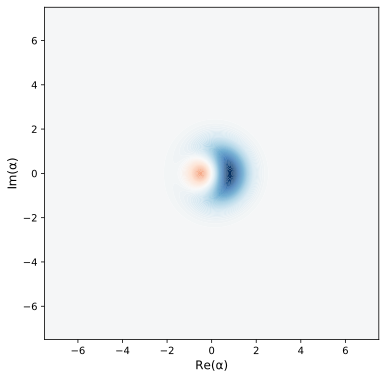

In [13]:
fig, ax = plt.subplots(ncols=1, figsize=(6,6))

state_0 = qt.fock(nA, 0)
state_1 = qt.fock(nA, 1)
na = qt.destroy(nA).dag() * qt.destroy(nA)

state = (state_0 + state_1)/np.sqrt(2)

qt.plot_wigner(state, ax=ax, fig=fig)

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

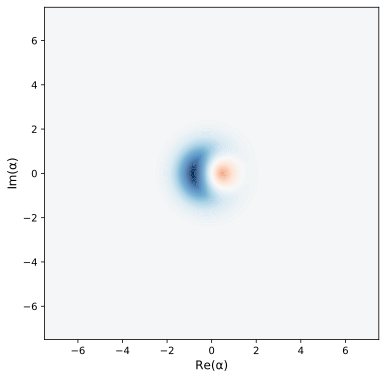

In [21]:
fig, ax = plt.subplots(ncols=1, figsize=(6,6))

state_0 = qt.fock(nA, 0)
state_1 = qt.fock(nA, 1)
na = qt.destroy(nA).dag() * qt.destroy(nA)

state = ((state_0 + np.exp(1j*3*np.pi/3) * state_1)/np.sqrt(2))

qt.plot_wigner(state, ax=ax, fig=fig)